In [9]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append(r'/home/selcuk/bitirme/')

from helpers.eda_helper import *
from helpers.dataPreprocessing_helper import *
from helpers.modelValidation_helper import *

In [10]:
df = pd.read_csv("../test_df/sensor-data.csv")
check_df(df)

##################### Shape #####################
(135386, 7)
##################### Types #####################
co2_value         float64
temp_value        float64
light_value       float64
humidity_value    float64
time               object
room               object
label               int64
dtype: object
##################### Head #####################
   co2_value  temp_value  light_value  humidity_value                 time  \
0      387.0       22.62        252.0           52.75  2013-08-23 23:04:53   
1      579.0       24.37        176.0           49.90  2013-08-23 23:04:57   
2      465.0       22.80        165.0           52.40  2013-08-23 23:04:57   
3      175.0       23.32        191.0           50.32  2013-08-23 23:04:57   
4      434.0       24.08         11.0           49.94  2013-08-23 23:05:01   

   room  label  
0   511      0  
1  656A      1  
2   644      0  
3   648      0  
4   564      1  
##################### Tail #####################
        co2_value  temp

/home/selcuk/bitirme/helpers/eda_helper.py:23: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)


In [11]:
cat_cols, num_cols, cat_but_car = grab_col_names(df, cat_th=10, car_th=100)

Observations: 135386
Variables: 7
cat_cols: 2
num_cols: 4
cat_but_car: 1
num_but_cat: 1


In [12]:
plt.figure(figsize=(10, 10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

In [13]:
################################################
# 1. EDA
################################################

# Kategorik değişken analizi
for col in cat_cols:
    cat_summary(df, col, False)

       room     Ratio
666   11338  8.374573
648    8892  6.567887
513    8369  6.181585
456    8059  5.952610
668    6727  4.968756
448    6673  4.928870
664    6666  4.923700
644    6140  4.535181
424    5641  4.166605
776    5280  3.899960
552    4485  3.312750
640    4314  3.186445
564    3969  2.931618
722    3820  2.821562
446    3605  2.662757
415    3461  2.556394
511    3354  2.477361
748    3160  2.334067
746    2947  2.176739
423    2769  2.045263
656B   2757  2.036400
719    2669  1.971400
734    2420  1.787482
656A   2378  1.756459
754    1896  1.400440
724    1527  1.127886
717    1033  0.763004
752     946  0.698743
726     887  0.655164
556     876  0.647039
419     838  0.618971
621     653  0.482325
621A    611  0.451302
458     556  0.410678
621E    545  0.402553
510     545  0.402553
462     518  0.382610
562     515  0.380394
442     401  0.296190
417     300  0.221589
621D    282  0.208293
454     270  0.199430
558     269  0.198691
621C    261  0.192782
721     26

count    135386.000000
mean        399.274231
std         119.081858
min          62.000000
5%          125.000000
10%         284.000000
20%         320.000000
30%         350.000000
40%         385.000000
50%         408.000000
60%         427.000000
70%         451.000000
80%         479.000000
90%         512.000000
95%         588.000000
99%         723.000000
max        1223.000000
Name: co2_value, dtype: float64


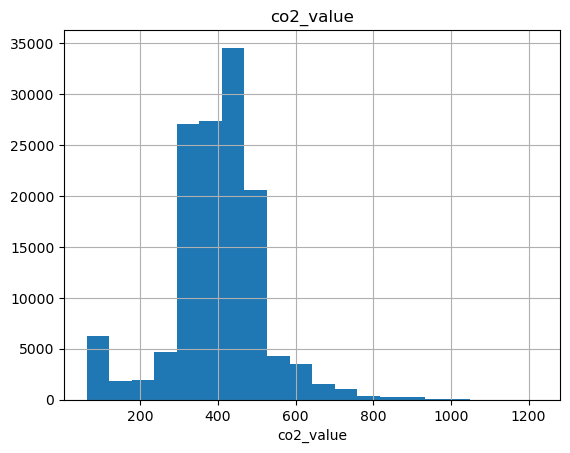

count    135386.000000
mean         23.415895
std          11.836374
min          20.200000
5%           21.890000
10%          22.200000
20%          22.500000
30%          22.670000
40%          22.860000
50%          23.110000
60%          23.330000
70%          23.540000
80%          23.800000
90%          24.240000
95%          24.760000
99%          26.040000
max         579.270000
Name: temp_value, dtype: float64


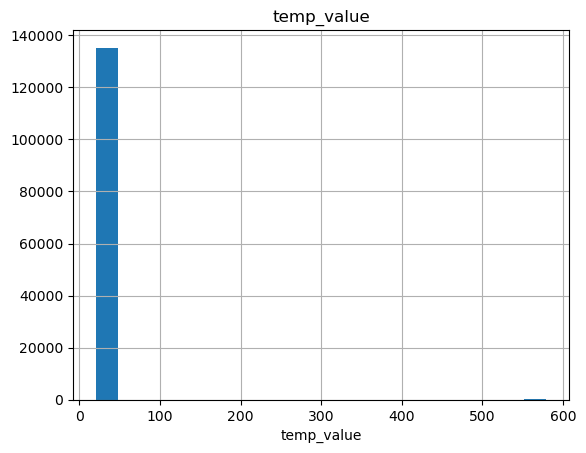

count    135386.000000
mean        140.571861
std         470.686763
min           0.000000
5%            2.000000
10%           3.000000
20%           3.000000
30%           4.000000
40%           4.000000
50%           4.000000
60%           6.000000
70%          17.000000
80%          64.000000
90%         184.000000
95%         567.500000
99%        2345.000000
max        2397.000000
Name: light_value, dtype: float64


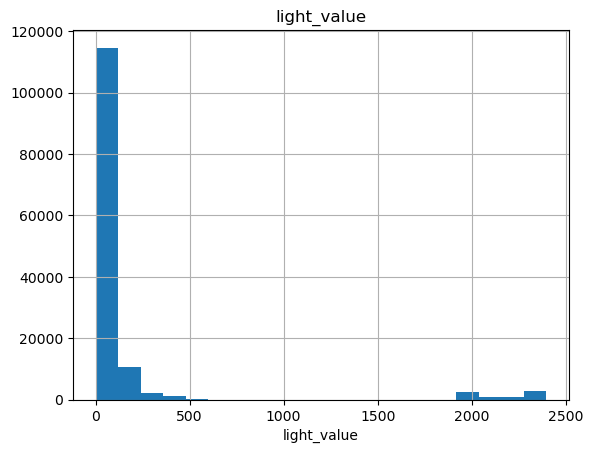

count    135386.000000
mean         56.891766
std           3.611998
min          42.120000
5%           50.830000
10%          52.050000
20%          53.790000
30%          54.920000
40%          56.080000
50%          57.280000
60%          58.050000
70%          58.670000
80%          59.740000
90%          61.340000
95%          62.720000
99%          66.120000
max          71.290000
Name: humidity_value, dtype: float64


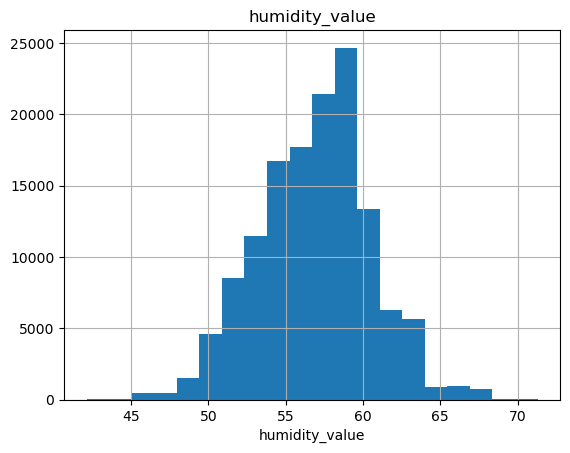

In [14]:
# Sayisal değişken analizi
for col in num_cols:
    num_summary(df, col, True)


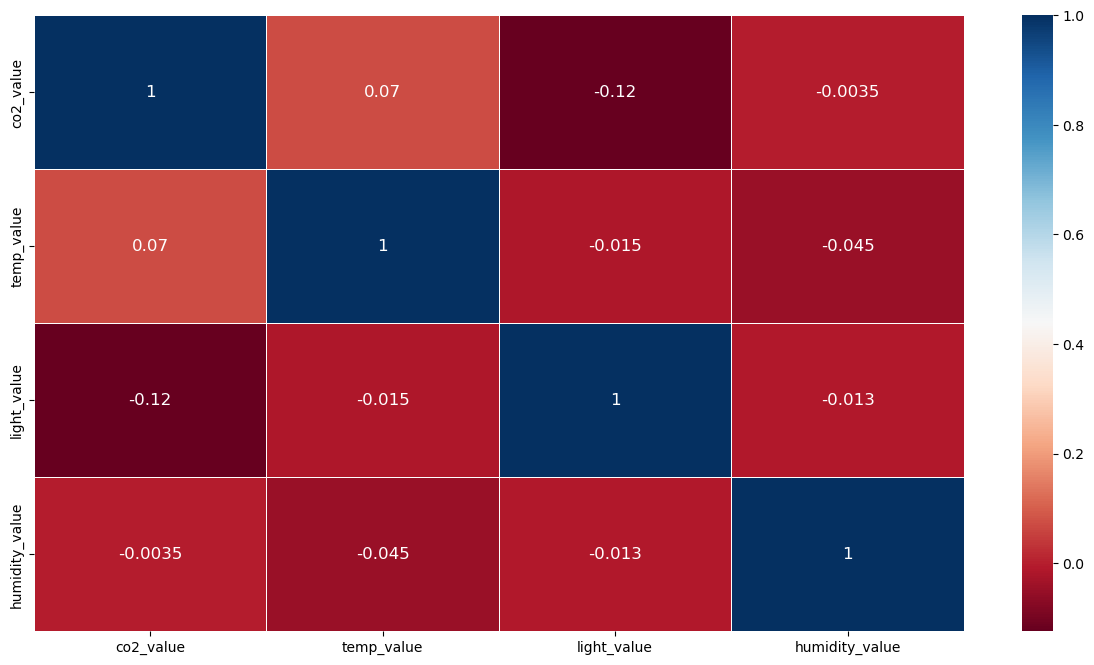

In [15]:
# Sayisal Değişkenlerin birbiri ile korelasyonu
correlation_matrix(df, num_cols)

In [18]:
# Target ile sayısal değişkenlerin ilişkisinin analizi
for col in num_cols:
    target_summary_with_num(df, "label", col, target_type="cat")

        co2_value
label            
0      388.405578
1      550.158184


       temp_value
label            
0       23.199368
1       26.421823


       light_value
label             
0       138.220898
1       173.209080


       humidity_value
label                
0           56.972999
1           55.764053




In [20]:
# Target ile kategorik değişkenlerin ilişkisinin analizi
for col in cat_cols:
    target_summary_with_cat(df, "label", col, target_type="cat")

In [21]:
################################################
# 2. Data Preprocessing & Feature Engineering
################################################

# Değişkenlerin tipi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135386 entries, 0 to 135385
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   co2_value       135386 non-null  float64
 1   temp_value      135386 non-null  float64
 2   light_value     135386 non-null  float64
 3   humidity_value  135386 non-null  float64
 4   time            135386 non-null  object 
 5   room            135386 non-null  object 
 6   label           135386 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 7.2+ MB


In [22]:
df.isnull().sum()

co2_value         0
temp_value        0
light_value       0
humidity_value    0
time              0
room              0
label             0
dtype: int64

In [23]:
cat_cols, num_cols, cat_but_car = grab_col_names(df, cat_th=10, car_th=100)
for col in num_cols:
    print(col, check_outlier(df, col, q1=0.01, q3=0.99))


Observations: 135386
Variables: 7
cat_cols: 2
num_cols: 4
cat_but_car: 1
num_but_cat: 1
co2_value False
temp_value True
light_value False
humidity_value False


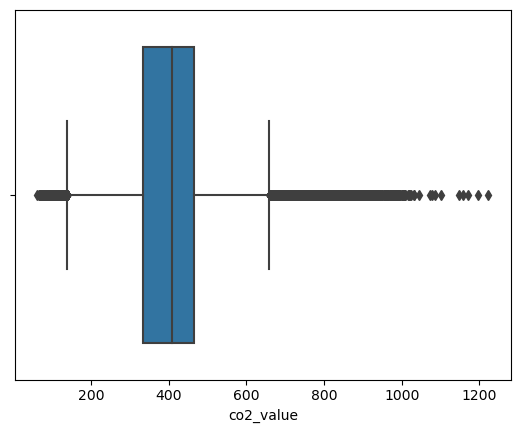

Empty DataFrame
Columns: [co2_value, temp_value, light_value, humidity_value, time, room, label]
Index: []


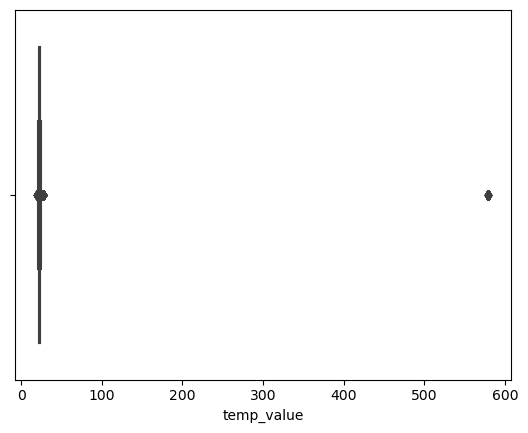

     co2_value  temp_value  light_value  humidity_value                 time  \
153      725.0      579.27        142.0           53.03  2013-08-23 23:09:23   
274      682.0      579.27        142.0           52.94  2013-08-23 23:15:28   
281      698.0      579.27        144.0           52.94  2013-08-23 23:15:48   
319      677.0      579.27        144.0           52.97  2013-08-23 23:17:38   
533      682.0      579.27        131.0           53.00  2013-08-23 23:27:33   

    room  label  
153  419      1  
274  419      1  
281  419      1  
319  419      1  
533  419      1  


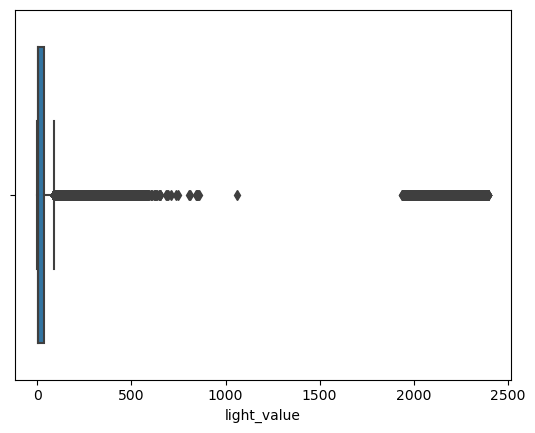

Empty DataFrame
Columns: [co2_value, temp_value, light_value, humidity_value, time, room, label]
Index: []


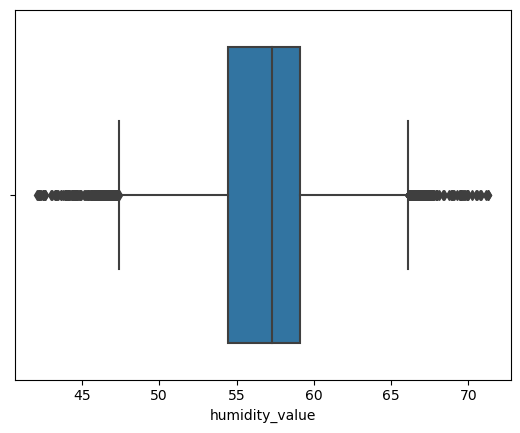

Empty DataFrame
Columns: [co2_value, temp_value, light_value, humidity_value, time, room, label]
Index: []


In [24]:
# Aykırı değerlerin tek değişkenli olarak yakalanması
for col in num_cols:
    grab_outliers(df, col, index=True, plot=True)

In [25]:
# Aykırı değerlerin baskılanması
for col in num_cols:
    replace_with_thresholds(df, col)

In [26]:
# Aykırı değerlerin çok değişkenli olarak yakalanması ve silinmesi
local_outliers = local_outlier_factor(df, num_cols, plot=False)
df = df.loc[~df.index.isin(local_outliers)]

In [27]:
check_df(df)

##################### Shape #####################
(135384, 7)
##################### Types #####################
co2_value         float64
temp_value        float64
light_value       float64
humidity_value    float64
time               object
room               object
label               int64
dtype: object
##################### Head #####################
   co2_value  temp_value  light_value  humidity_value                 time  \
0      387.0       22.62        252.0           52.75  2013-08-23 23:04:53   
1      579.0       24.37        176.0           49.90  2013-08-23 23:04:57   
2      465.0       22.80        165.0           52.40  2013-08-23 23:04:57   
3      175.0       23.32        191.0           50.32  2013-08-23 23:04:57   
4      434.0       24.08         11.0           49.94  2013-08-23 23:05:01   

   room  label  
0   511      0  
1  656A      1  
2   644      0  
3   648      0  
4   564      1  
##################### Tail #####################
        co2_value  temp

/home/selcuk/bitirme/helpers/eda_helper.py:23: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
